# Facial Recognition using Deep Learning

In [29]:
#import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from keras.utils import np_utils
import itertools

In [30]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']


In [31]:
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('x_train shape : {}'.format(x_train.shape))

print('Y-train : {}'.format(y_train))
print('Y-train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
x_train shape : (240, 10304)
Y-train : [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13

In [32]:
#spliting the dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.5, random_state= 1234)

In [33]:
print(x_train.shape)
print(x_valid.shape)

(120, 10304)
(120, 10304)


In [34]:
#change the size of images
im_rows =112
im_cols =92
batch_size =512
im_shape= (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*im_shape)
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (120, 112, 92, 1)
x_test shape: (160, 112, 92, 1)


# Now Lets make the model

In [35]:
model = Sequential()
model.add(Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add( Dense(2024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))


In [36]:
cnn_model = model
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2024)             

In [37]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= Adam(lr=0.001),
    metrics=['accuracy']
)

# Train the model

In [38]:
history= cnn_model.fit(
    np.array(x_train),
    np.array(y_train),
    epochs=250,
    verbose=2,
    validation_data=(np.array(x_valid), np.array(y_valid))
)

Epoch 1/250
4/4 - 2s - loss: 3.6675 - accuracy: 0.0500 - val_loss: 3.0048 - val_accuracy: 0.0333
Epoch 2/250
4/4 - 3s - loss: 3.0074 - accuracy: 0.0417 - val_loss: 2.9988 - val_accuracy: 0.0333
Epoch 3/250
4/4 - 2s - loss: 3.0189 - accuracy: 0.0417 - val_loss: 3.0087 - val_accuracy: 0.0333
Epoch 4/250
4/4 - 2s - loss: 2.9779 - accuracy: 0.0917 - val_loss: 3.0098 - val_accuracy: 0.0333
Epoch 5/250
4/4 - 2s - loss: 3.0177 - accuracy: 0.0750 - val_loss: 2.9905 - val_accuracy: 0.0333
Epoch 6/250
4/4 - 3s - loss: 2.9580 - accuracy: 0.0917 - val_loss: 2.9870 - val_accuracy: 0.0333
Epoch 7/250
4/4 - 3s - loss: 2.9559 - accuracy: 0.1333 - val_loss: 2.9688 - val_accuracy: 0.0667
Epoch 8/250
4/4 - 3s - loss: 2.9092 - accuracy: 0.1167 - val_loss: 2.9571 - val_accuracy: 0.0667
Epoch 9/250
4/4 - 2s - loss: 2.7898 - accuracy: 0.1417 - val_loss: 2.8723 - val_accuracy: 0.1167
Epoch 10/250
4/4 - 2s - loss: 2.6772 - accuracy: 0.1250 - val_loss: 2.7445 - val_accuracy: 0.1500
Epoch 11/250
4/4 - 3s - loss:

Epoch 85/250
4/4 - 2s - loss: 7.2128e-04 - accuracy: 1.0000 - val_loss: 0.1982 - val_accuracy: 0.9417
Epoch 86/250
4/4 - 2s - loss: 3.0132e-04 - accuracy: 1.0000 - val_loss: 0.1800 - val_accuracy: 0.9417
Epoch 87/250
4/4 - 2s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1690 - val_accuracy: 0.9417
Epoch 88/250
4/4 - 2s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1627 - val_accuracy: 0.9333
Epoch 89/250
4/4 - 2s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9417
Epoch 90/250
4/4 - 4s - loss: 4.6611e-04 - accuracy: 1.0000 - val_loss: 0.1756 - val_accuracy: 0.9500
Epoch 91/250
4/4 - 2s - loss: 1.5522e-04 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9500
Epoch 92/250
4/4 - 2s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9417
Epoch 93/250
4/4 - 2s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2227 - val_accuracy: 0.9417
Epoch 94/250
4/4 - 2s - loss: 7.1147e-04 - accuracy: 1.0000 - val_loss: 0.2326 - val_accuracy: 0.9333


Epoch 167/250
4/4 - 2s - loss: 0.0225 - accuracy: 0.9917 - val_loss: 0.5455 - val_accuracy: 0.9250
Epoch 168/250
4/4 - 2s - loss: 0.0754 - accuracy: 0.9917 - val_loss: 0.4609 - val_accuracy: 0.9167
Epoch 169/250
4/4 - 2s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.9083
Epoch 170/250
4/4 - 2s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.4698 - val_accuracy: 0.9083
Epoch 171/250
4/4 - 2s - loss: 0.0162 - accuracy: 0.9917 - val_loss: 0.3693 - val_accuracy: 0.9167
Epoch 172/250
4/4 - 2s - loss: 0.0416 - accuracy: 0.9917 - val_loss: 0.3537 - val_accuracy: 0.9083
Epoch 173/250
4/4 - 2s - loss: 4.1003e-04 - accuracy: 1.0000 - val_loss: 0.5500 - val_accuracy: 0.9000
Epoch 174/250
4/4 - 2s - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.5545 - val_accuracy: 0.8750
Epoch 175/250
4/4 - 2s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5554 - val_accuracy: 0.8583
Epoch 176/250
4/4 - 2s - loss: 0.0205 - accuracy: 0.9917 - val_loss: 0.4340 - val_accuracy: 0.8833
Epoch 

Epoch 248/250
4/4 - 2s - loss: 2.0331e-04 - accuracy: 1.0000 - val_loss: 0.3073 - val_accuracy: 0.9250
Epoch 249/250
4/4 - 2s - loss: 1.7229e-05 - accuracy: 1.0000 - val_loss: 0.3066 - val_accuracy: 0.9250
Epoch 250/250
4/4 - 2s - loss: 1.8465e-05 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 0.9250


In [39]:
#evaluate on test data
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 1.3299
test acc 0.8313


# RESULTS

In [40]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


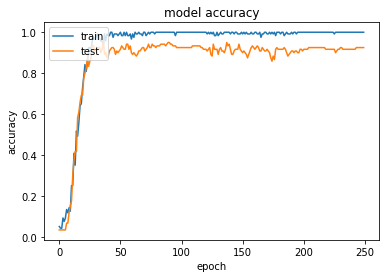

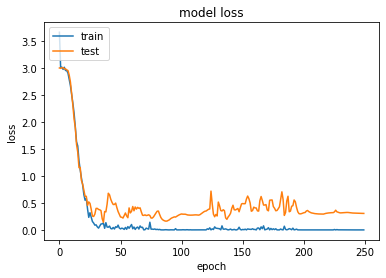

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy : 
0.83125
Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0]
 [0 

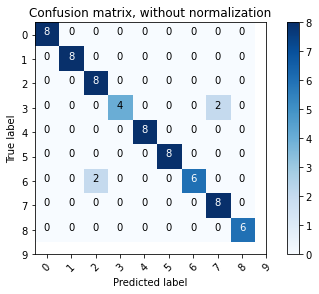

Confusion matrix, without normalization


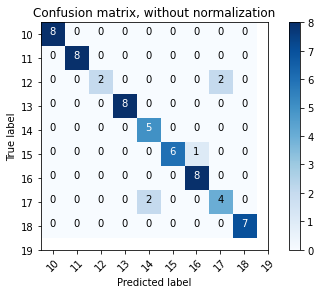

Confusion matrix:
[[5 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 6 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 4 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 7]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1

In [43]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))